# Time Series Analysis and Forecasting with Prophet

This notebook demonstrates time series analysis and forecasting using Facebook Prophet on the `facebook-page-engagement.csv` dataset. The workflow includes data loading, preprocessing, splitting, modeling, forecasting, visualization, and evaluation.

In [5]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Load and Explore Data
Load the engagement data and perform basic exploration: head, info, describe, and plot the time series.

In [6]:
# Load the data
df = pd.read_csv('facebook-page-engagement.csv')
df.head()

,date,engagement_count,remark
0,2022-01-01,200,New Year boost
1,2022-01-02,170,NaN
2,2022-01-03,150,NaN
3,2022-01-04,155,NaN
4,2022-01-05,160,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              67 non-null     object
 1   engagement_count  67 non-null     int64 
 2   remark            21 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.7+ KB


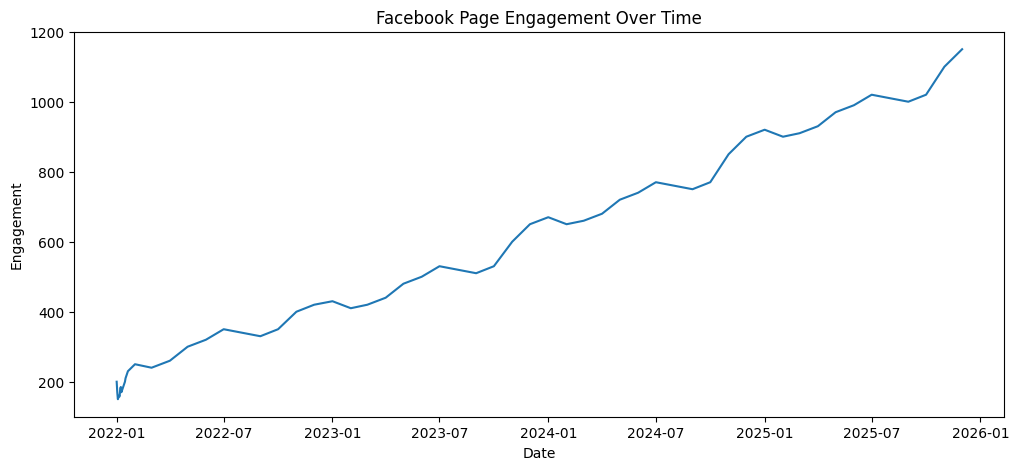

In [7]:
# Data exploration
df.info()
df.describe()

# Plot the time series (assuming columns: 'date' and 'engagement')
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['engagement_count'])
plt.title('Facebook Page Engagement Over Time')
plt.xlabel('Date')
plt.ylabel('Engagement')
plt.show()

## Preprocess Data for Prophet
Prepare the data for Prophet by renaming columns to 'ds' and 'y', handling missing values, and ensuring correct datetime format.

In [8]:
# Prepare data for Prophet
prophet_df = df[['date', 'engagement_count']].rename(
    columns={'date': 'ds', 'engagement_count': 'y'})
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])
prophet_df = prophet_df.sort_values('ds')
prophet_df = prophet_df.dropna()
prophet_df.head()

,ds,y
0,2022-01-01,200
1,2022-01-02,170
2,2022-01-03,150
3,2022-01-04,155
4,2022-01-05,160


## Split Data into Training and Test Sets
Split the time series into training and test sets. We'll use the last 20% of the data as the test set.

In [9]:
# Split data: last 20% for test, rest for training
split_idx = int(len(prophet_df) * 0.8)
train_df = prophet_df.iloc[:split_idx]
test_df = prophet_df.iloc[split_idx:]
print(f"Training set: {train_df.shape[0]} rows, Test set: {test_df.shape[0]} rows")
train_df.tail(), test_df.head()

Training set: 53 rows, Test set: 14 rows


(           ds    y
 48 2024-06-01  740
 49 2024-07-01  770
 50 2024-08-01  760
 51 2024-09-01  750
 52 2024-10-01  770,
            ds    y
 53 2024-11-01  850
 54 2024-12-01  900
 55 2025-01-01  920
 56 2025-02-01  900
 57 2025-03-01  910)

## Fit Prophet Model on Training Data
Instantiate and fit a Prophet model using the training data.

In [10]:
# Fit Prophet model
model = Prophet()
model.fit(train_df)

17:21:06 - cmdstanpy - INFO - Chain [1] start processing
17:21:06 - cmdstanpy - INFO - Chain [1] done processing
17:21:06 - cmdstanpy - INFO - Chain [1] done processing


## Forecast Future Engagement
Use the fitted Prophet model to forecast engagement for the test period.

In [11]:
# Create a dataframe to hold future dates (same length as test set)
future = test_df[['ds']].copy()
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2024-11-01,830.463803,817.644669,842.892540
1,2024-12-01,914.211293,902.041674,927.073334
2,2025-01-01,858.706425,845.850741,871.203431
3,2025-02-01,900.779943,887.604797,912.379513
4,2025-03-01,896.187722,883.231490,909.403491


## Visualize Forecast vs Actuals
Plot the Prophet forecast alongside the actual test data for visual comparison.

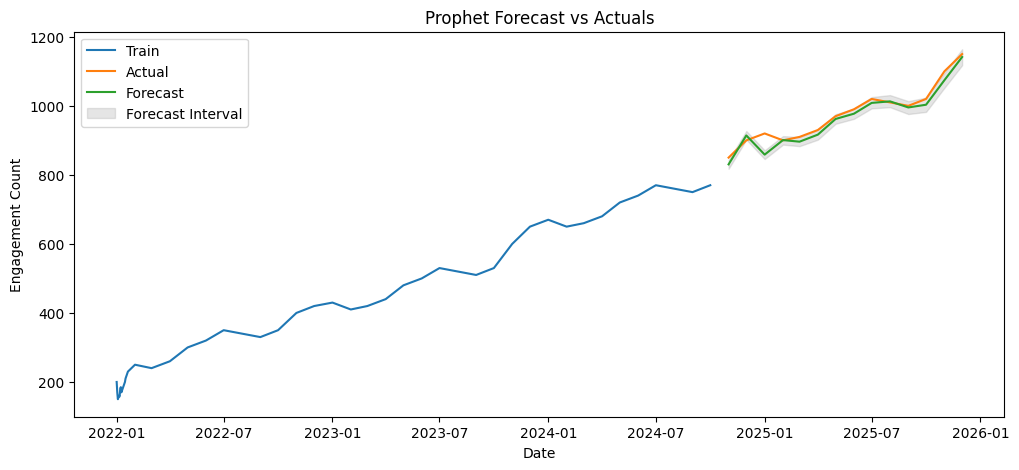

In [12]:
# Plot forecast vs actuals
plt.figure(figsize=(12, 5))
plt.plot(train_df['ds'], train_df['y'], label='Train')
plt.plot(test_df['ds'], test_df['y'], label='Actual')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Forecast Interval')
plt.title('Prophet Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Engagement Count')
plt.legend()
plt.show()

## Evaluate Forecast Performance
Calculate and display evaluation metrics such as MAE, RMSE, and MAPE comparing forecasted and actual values.

In [13]:
# Evaluation metrics
# Align forecast and test set
y_true = test_df['y'].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE: 15.28
RMSE: 20.90
MAPE: 1.59%
